## Stakeholder Plots
Wind-driven currents plots for the Stakeholders 2016 meeting poster and brochure

In [8]:
from salishsea_tools import nc_tools, data_tools, tidetools, visualisations, viz_tools
from collections     import OrderedDict
from matplotlib      import pyplot, animation, rcParams, patches
from dateutil        import parser
from importlib       import reload
import datetime
import os
import xarray as xr

%matplotlib inline
rcParams.update({'font.size': 14})
rcParams["axes.formatter.useoffset"] = False

In [9]:
# Load and process results
timerange = ['2016 Oct 16 00:00', '2016 Oct 17 00:00']
GEM = nc_tools.load_GEM_from_erddap(timerange)
NEMO = nc_tools.load_NEMO_from_path(timerange, fields=['u_vel', 'v_vel'], depth=[0, 1], model='nowcast-green').isel(depth=0)
SSH = xr.open_dataset('/results/SalishSea/nowcast-green/16oct16/PointAtkinson.nc')
NEMO['u_vel'] = viz_tools.unstagger_xarray(NEMO.u_vel, 'gridX')
NEMO['v_vel'] = viz_tools.unstagger_xarray(NEMO.v_vel, 'gridY')
NEMO['u_vel'], NEMO['v_vel'] = viz_tools.rotate_vel(NEMO['u_vel'], NEMO['v_vel'])

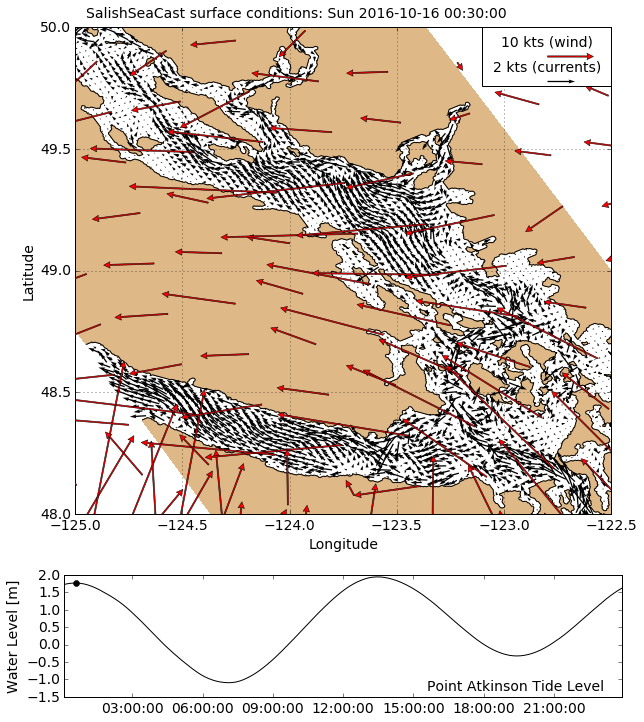

In [10]:
# Make figure and coastline

rcParams.update({'font.size': 14})
fig, ax = pyplot.subplots(2, 1, figsize=(10, 12),  gridspec_kw={'height_ratios':[4, 1]})
visualisations.create_figure(ax[0], NEMO.isel(time=0))

# Plot surface currents
Q_vel = visualisations.plot_velocity(ax[0], 'NEMO', NEMO.isel(time=0))
Q_wind = visualisations.plot_velocity(ax[0], 'GEM', GEM.isel(time=0), spacing=10,
                    color='red', scale=60, linewidth=0.5, headwidth=5, mask=False)

# Plot quiver key with a white rectangle
lbox = ax[0].add_patch(patches.Rectangle((0.76, 0.88), 0.24, 0.12,
                    facecolor='white', transform=ax[0].transAxes, zorder=10))
Qkey_wind = pyplot.quiverkey(Q_wind, 0.88, 0.94, 5.14, '10 kts (wind)', coordinates='axes').set_zorder(11)
Qkey_vel  = pyplot.quiverkey(Q_vel,  0.88, 0.89, 1.03, '2 kts (currents)', coordinates='axes').set_zorder(12)
TXT_time = ax[0].text(0.02, 1.02, 'SalishSeaCast surface conditions: ' +
                   nc_tools.xarraytime_to_datetime(NEMO.time[0]).strftime('%a %Y-%m-%d %H:%M:%S'), transform=ax[0].transAxes)

ax[1].plot(SSH.time_counter, SSH.sossheig.isel(x=0, y=0), 'k-')
ax[1].plot(SSH.time_counter.sel(time_counter='2016 Oct 16 00:30', method='nearest'),
           SSH.sossheig.isel(x=0, y=0).sel(time_counter='2016 Oct 16 00:30', method='nearest'), 'ko')
ax[1].set_ylabel('Water Level [m]')
ax[1].text(0.65, 0.05, 'Point Atkinson Tide Level', transform=ax[1].transAxes)

fig.savefig('/home/bmoorema/Desktop/currents.png', transparent=True, dpi=300, bbox_inches='tight')